# Regressie - intro

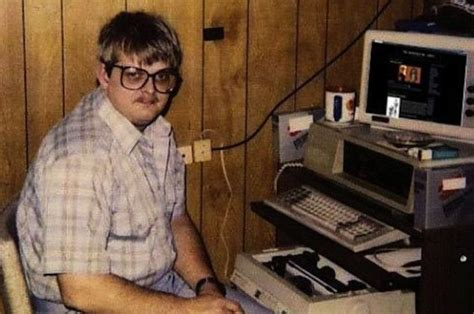

## Install

In [1]:
!pip3 install numpy
!pip3 install scipy

## Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [27]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y,'*-',linewidth=2.0,)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

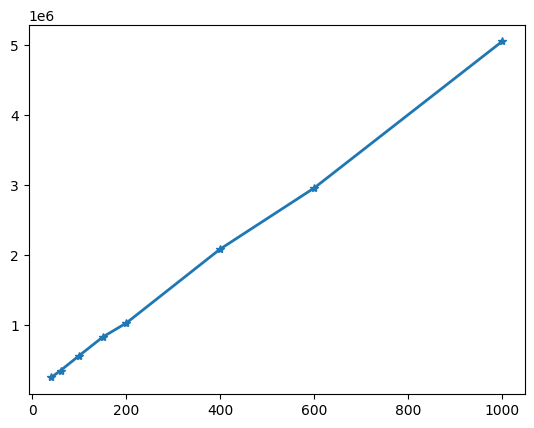

In [67]:
# ...
def houseprice(area,):
    price_off = 25_000 # underscore kun je gebruiken als 1000 scheidingsteken
    pri_pa = 5_000
    price =price_off+np.array(area)*pri_pa
    price = np.random.normal(price,50_000)
    return price

arealist = [40,60,100,150,200,400,600,1_000]
hprices = houseprice(arealist)
ax= plot_init()
plot_add(ax ,arealist,hprices)
#plot_show()    




### Stap 2: Bekijk interval [50, 75] m2

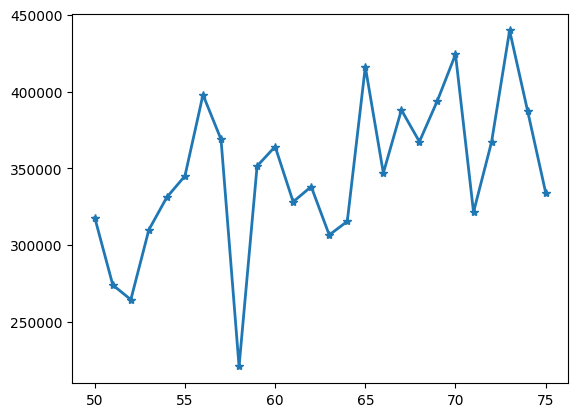

In [62]:
area_50_75 = np.arange(50,76) 

price_50_75 = houseprice(area_50_75)


plot_graph(area_50_75,price_50_75)
#plot_add(ax,area_50_75,price_50_75)
#plot_show()

# ...

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

[  3555.33908826 124846.24855806]
[[ 1.28135740e+06 -8.00848367e+07]
 [-8.00848367e+07  5.07737861e+09]]
[302613.20297095 306168.54205921 309723.88114747 313279.22023573
 316834.55932398 320389.89841224 323945.2375005  327500.57658876
 331055.91567702 334611.25476527 338166.59385353 341721.93294179
 345277.27203005 348832.61111831 352387.95020656 355943.28929482
 359498.62838308 363053.96747134 366609.30655959 370164.64564785
 373719.98473611 377275.32382437 380830.66291263 384386.00200088
 387941.34108914 391496.6801774 ]


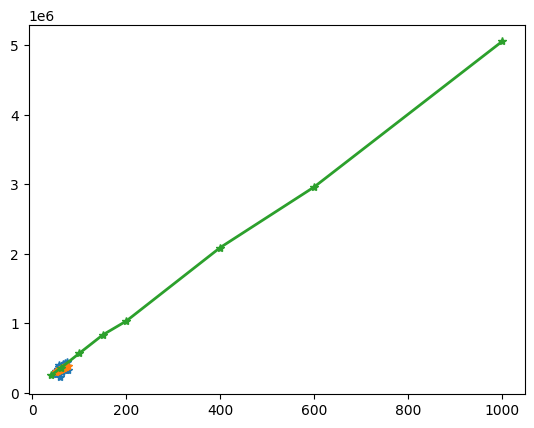

In [70]:
# Define our model
def modelfunc(x,a,b):
    return a*np.array(x)+b

price_off = 25_000 # underscore kun je gebruiken als 1000 scheidingsteken
pri_pa = 5_000

# # ...

# Use scipy optimize package
pred_par,var=cp.optimize.curve_fit(modelfunc,area_50_75,price_50_75)
print(pred_par)
print(var)
# ...
 
# Create fit
price_pred = pred_par[0]* np.array(area_50_75)+pred_par[1]
print(price_pred)
# ...

# Plot fit
ax = plot_init()
plot_add(ax,area_50_75,price_50_75)
plot_add(ax,area_50_75,price_pred)
plot_add(ax,arealist,hprices)
plot_show()


# ...

### Stap 4: Extrapoleer

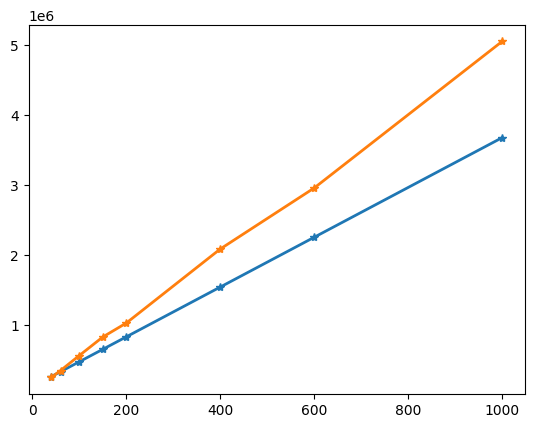

In [72]:
# Create fit

price_pred_all = pred_par[0]* np.array(arealist)+pred_par[1]

# Plot prediction for whole range
ax = plot_init()
#plot_add(ax,area_50_75,price_50_75)
plot_add(ax,arealist,price_pred_all)
plot_add(ax,arealist,hprices)
plot_show()
# ...

## Polynomiale verbanden

### Model

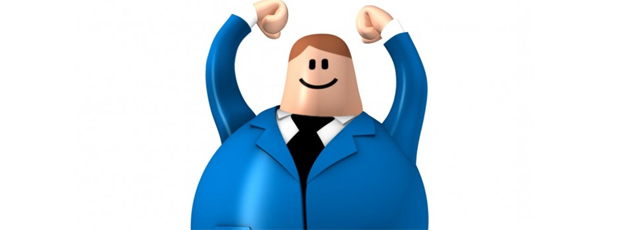

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

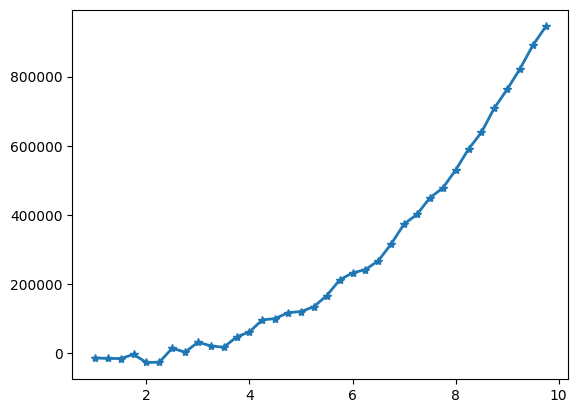

In [86]:
rho = 1040 #kg/m3

arms = 7
legs = 12.4
head = 3.7
bol_radii = np.arange(1,10,0.25)


bollman_mass = np.random.normal(rho*bol_radii**3 +  arms+legs+head,20000.3)
plot_graph(bol_radii,bollman_mass)

### Stap 2: Fit data

[-8.07696706e+04 -7.50960395e+04 -6.81616014e+04 -5.99663564e+04
 -5.05103045e+04 -3.97934456e+04 -2.78157798e+04 -1.45773071e+04
 -7.80275024e+01  1.56820590e+04  3.27029525e+04  5.09846529e+04
  7.05271602e+04  9.13304745e+04  1.13394596e+05  1.36719524e+05
  1.61305259e+05  1.87151801e+05  2.14259150e+05  2.42627305e+05
  2.72256268e+05  3.03146038e+05  3.35296614e+05  3.68707998e+05
  4.03380188e+05  4.39313185e+05  4.76506990e+05  5.14961601e+05
  5.54677019e+05  5.95653244e+05  6.37890276e+05  6.81388115e+05
  7.26146761e+05  7.72166213e+05  8.19446473e+05  8.67987540e+05]


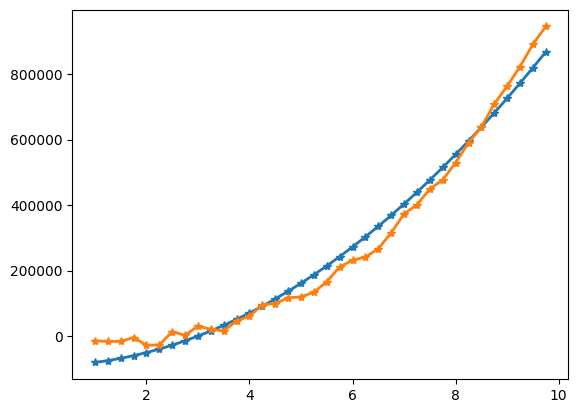

In [88]:
# Define our model
def modelfunc(x,a,b):
    return a*np.array(x)**2+b

# ...

# Use scipy optimize package
pred_par,var=cp.optimize.curve_fit(modelfunc,bol_radii,bollman_mass)
# ...

# Create fit
mass_pred = pred_par[0] *np.array(bol_radii)**2+pred_par[1]
print(mass_pred)
# ...

# Plot fit
ax = plot_init()
#plot_add(ax,bol_radii,bollman_mass)
plot_add(ax,bol_radii,mass_pred)
plot_add(ax,bol_radii,bollman_mass)
plot_show()

# ...s

# Define our model


# # ...



# ...

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861